In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

https://www.kaggle.com/datasets/vivekprajapati2048/amazon-customer-reviews

In [2]:
df = pd.read_csv(r"C:\Users\saksh\OneDrive\Documents\intellipant\Capstone project\Sentiment analysis\Reviews (1).csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df = df.dropna()

<Axes: >

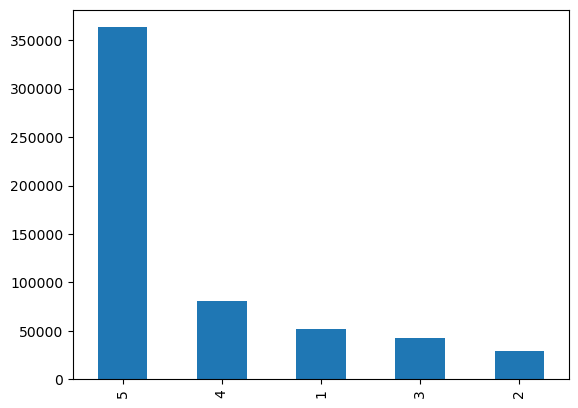

In [6]:
df['Score'].value_counts().plot(kind = 'bar')

In [7]:
df['Helpfulness'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']


C:\Users\saksh\AppData\Local\Temp\ipykernel_19636\1295388454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Helpfulness'] = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']


In [8]:
df['Helpfulness'] = df['Helpfulness'].replace(np.nan,0)

C:\Users\saksh\AppData\Local\Temp\ipykernel_19636\3591065020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Helpfulness'] = df['Helpfulness'].replace(np.nan,0)


In [9]:
df['Recommended'] = df['Score'].map({1.0:0, 2.0:0,3.0: 0,5.0:1,4.0:1})

C:\Users\saksh\AppData\Local\Temp\ipykernel_19636\2697285962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recommended'] = df['Score'].map({1.0:0, 2.0:0,3.0: 0,5.0:1,4.0:1})


In [10]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,Recommended
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,1
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,1
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,1


In [11]:

df =df.reset_index(drop=True)

df['Text'][1]

from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize

word_token = word_tokenize(df['Text'][1]) 

stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ['(',')','.',',']
stop_words.extend(new_stopwords)

useful = list()
for token in word_token:
    if token.lower() not in stop_words:
        useful.append(token)
        
print(useful)

lemener = nltk.stem.WordNetLemmatizer()
important_words = list()
for word in useful:
    important_words.append(lemener.lemmatize(word,'n'))
    

important_words


text = ' '.join(important_words)
text

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

In [12]:
%%time
from nltk.sentiment import SentimentIntensityAnalyzer
neg = list()
neu = list()
pos = list()
comp = list()
sia = SentimentIntensityAnalyzer()
for i in range(0,len(df['Text'])):
    score = sia.polarity_scores(df['Text'][i])
    neg.append(score['neg'])
    pos.append(score['pos'])
    neu.append(score['neu'])
    comp.append(score['compound'])

CPU times: total: 10min 39s
Wall time: 10min 59s


In [13]:
%%time
df['Neg_score'] = neg
df['Neu_score'] = neu
df['Pos_score'] = pos
df['Compound_score'] = comp

CPU times: total: 578 ms
Wall time: 640 ms


In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,Recommended,Neg_score,Neu_score,Pos_score,Compound_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,1,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,0,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,1,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,1,0.000,0.552,0.448,0.9468


In [24]:
X = df.iloc[:,[4,5,6,12,13,14,15]]
Y = df['Recommended']

In [25]:
X

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Neg_score,Neu_score,Pos_score,Compound_score
0,1,1,5,0.000,0.695,0.305,0.9441
1,0,0,1,0.138,0.862,0.000,-0.5664
2,1,1,4,0.091,0.754,0.155,0.8265
3,3,3,2,0.000,1.000,0.000,0.0000
4,0,0,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...
568406,0,0,5,0.072,0.600,0.327,0.8589
568407,0,0,2,0.190,0.697,0.114,-0.4848
568408,2,2,5,0.037,0.884,0.078,0.4352
568409,1,1,5,0.041,0.506,0.452,0.9717


In [26]:
Y

0         1
1         0
2         1
3         0
4         1
         ..
568406    1
568407    0
568408    1
568409    1
568410    1
Name: Recommended, Length: 568411, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
importances = RFC.feature_importances_
importances

array([0.00201862, 0.00555776, 0.87527287, 0.02516335, 0.00643418,
       0.03277322, 0.05277998])

Y.value_counts()

from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y,6)

X

Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [ ]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

from sklearn.svm import SVR
classifier = SVR(kernel='rbf', C=1e3, gamma=0.1)
classifier.fit(X_train, Y_train)

In [ ]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [ ]:
from keras import models
from keras.layers import Dense, Dropout, BatchNormalization

model = models.Sequential()
model.add(Dense(8, activation='relu', input_shape=(6,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())
# model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

In [ ]:
model.summary()

In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

model.fit(X_train, Y_train,
          batch_size=64,
          epochs=10,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model= xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

In [ ]:
y_pred_train = xgb_model.predict(X_train)

In [ ]:
accuracy_score(Y_train,y_pred_train)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model_lg= LogisticRegression()
model_lg.fit(X_train, Y_train)

In [ ]:
pred = model_lg.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred)